# California Housing Prices [Kaggle Link](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

In [1]:
# Get the dataset
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-10-17 09:47:02--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  1.78MB/s    in 0.8s    

2023-10-17 09:47:04 (1.78 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [243]:
import pandas as pd
def load_dataset(data_file: str = "housing.csv"):
    df = pd.read_csv(data_file)
    return df

In [265]:
df = load_dataset()

### Preparing the dataset 

For this homework, we only want to use a subset of data. This is the same subset we used in homework #2.

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Preparation:

* Apply the log tranform to `median_house_value`.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframe into matrices.

In [266]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [267]:
df = df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]
# df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

In [268]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [269]:
df.fillna(value=0, inplace=True)

In [270]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [271]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN    9136
INLAND       6551
Name: count, dtype: int64

### Apply the log tranform to `median_house_value`.

In [272]:
import numpy as np
df.loc[:, 'median_house_value'] = np.log1p(df['median_house_value'])

### Do train/validation/test split with 60%/20%/20% distribution.

In [273]:
from sklearn.model_selection import train_test_split

def split_train_val_test_dataset(df):
    df.fillna(value=0, inplace=True)
    df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
    df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train['median_house_value'].values
    y_val = df_val['median_house_value'].values
    y_test = df_test['median_house_value'].values
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    return df_train, df_val, df_test, y_train, y_val, y_test
    
    

In [274]:
df_train, df_val, df_test, y_train, y_val, y_test = split_train_val_test_dataset(df)

### Use `DictVectorizer(sparse=True)` to turn the dataframe into matrices.

In [275]:
from sklearn.feature_extraction import DictVectorizer

def trun_train_dataframe_into_matrices(df):
    dv = DictVectorizer(sparse=False)
    df_dict = df.to_dict(orient='records')
    X = dv.fit_transform(df_dict)
    return dv, X

In [276]:
def trun_val_dataframe_into_matrices(df, dv):
    df_dict = df.to_dict(orient='records')
    X = dv.transform(df_dict)
    return X

In [277]:
def trun_dataframe_into_matrices(df_train, df_val):
    dv, X_train = trun_train_dataframe_into_matrices(df_train)
    X_val = trun_val_dataframe_into_matrices(df_val, dv)
    return X_train, X_val, dv

In [278]:
X_train, X_val, dv = trun_dataframe_into_matrices(df_train, df_val)

In [279]:
X_train[0]

array([  68.   ,   13.   ,   37.93 , -120.25 ,    3.375,    0.   ,
          1.   ,  196.   ,   76.   ,  493.   ])

In [280]:
# longitude,latitude,housing_median_age,total_rooms,
# total_bedrooms,population,households,median_income,
# median_house_value,ocean_proximity

In [281]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-120.25,37.93,13.0,493.0,76.0,196.0,68.0,3.3750,INLAND
1,-118.40,34.00,10.0,1526.0,339.0,705.0,268.0,5.8083,<1H OCEAN
2,-121.67,38.85,46.0,645.0,131.0,410.0,122.0,1.7417,INLAND
3,-118.14,33.88,24.0,3305.0,982.0,2085.0,881.0,2.6641,<1H OCEAN
4,-118.11,33.92,34.0,1414.0,263.0,983.0,264.0,4.1767,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
9406,-118.00,34.12,37.0,1340.0,325.0,928.0,333.0,3.9219,INLAND
9407,-118.10,34.10,34.0,2578.0,645.0,1628.0,617.0,2.3400,<1H OCEAN
9408,-117.45,34.01,26.0,3042.0,598.0,1720.0,551.0,2.7600,INLAND
9409,-117.94,34.03,35.0,1375.0,249.0,1015.0,239.0,4.0521,<1H OCEAN


## Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `ocean_proximity`
* `total_rooms`
* `latitude`
* `population`

In [282]:
from sklearn.tree import DecisionTreeRegressor, export_text

In [283]:
def train_decision_tree_regressor(X, y):
    dt = DecisionTreeRegressor(max_depth=1)
    dt.fit(X, y)
    return dt

In [284]:
dt = train_decision_tree_regressor(X_train, y_train)

In [285]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



In [286]:
list(dv.get_feature_names_out())

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

> **Answer** `ocean_proximity`

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on validation?

* 0.045
* 0.245
* 0.545
* 0.845

In [287]:
from sklearn.ensemble import RandomForestRegressor
def train_random_forest_regressor(X, y, **kargs):
    rfr = RandomForestRegressor(n_estimators = kargs['n_estimators'], 
                                random_state = kargs['random_state'], 
                                n_jobs = kargs['n_jobs'])
    rfr.fit(X, y)
    return rfr

In [288]:
rfr = train_random_forest_regressor(X_train, y_train, n_estimators=10, random_state=1, n_jobs=-1)

In [292]:
from sklearn.metrics import mean_squared_error

def rmse(y, y_pred):
    mse = mean_squared_error(y, y_pred)
    return round(np.sqrt(mse), 3)

In [293]:
y_pred = rfr.predict(X_val)

In [294]:
rmse(y_val, y_pred)

0.245

> **Answer** `0.245`

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?

- 10
- 25
- 50
- 160

In [295]:
def random_forest_regressor_evaluation():
    scores = []
    for estimator in range(10, 201, 10):
        rfr = train_random_forest_regressor(X_train, y_train, 
                                            n_estimators=estimator, 
                                            random_state=1, 
                                            n_jobs=-1)
        y_pred = rfr.predict(X_val)
        rmse_value = rmse(y_val, y_pred)
        scores.append((estimator, rmse_value))
    return scores

In [296]:
scores = random_forest_regressor_evaluation()

In [297]:
scores

[(10, 0.245),
 (20, 0.238),
 (30, 0.236),
 (40, 0.235),
 (50, 0.234),
 (60, 0.234),
 (70, 0.234),
 (80, 0.234),
 (90, 0.234),
 (100, 0.234),
 (110, 0.234),
 (120, 0.234),
 (130, 0.234),
 (140, 0.234),
 (150, 0.234),
 (160, 0.233),
 (170, 0.233),
 (180, 0.234),
 (190, 0.234),
 (200, 0.234)]

In [298]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

In [299]:
df_scores

,n_estimators,rmse
0,10,0.245
1,20,0.238
2,30,0.236
3,40,0.235
4,50,0.234
5,60,0.234
6,70,0.234
7,80,0.234
8,90,0.234
9,100,0.234


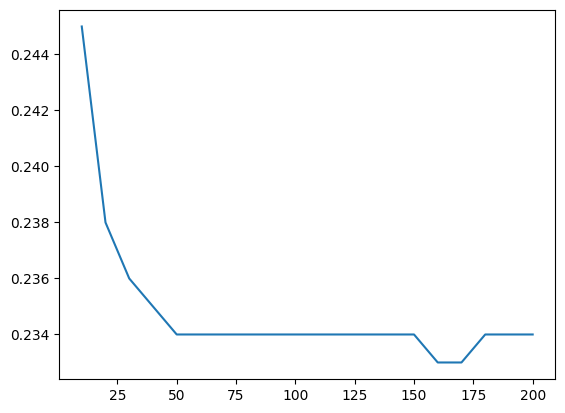

In [300]:
from matplotlib import pyplot as plt 
plt.plot(df_scores.n_estimators, df_scores.rmse)

> **Answer** `160`

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`


What's the best `max_depth`:

* 10
* 15
* 20
* 25

In [301]:
def train_random_forest_regressor(X, y, **kwargs):
    n_estimators = kwargs.get('n_estimators', 100)  # Default value is 100 if not provided
    random_state = kwargs.get('random_state', None)  # Default value is None if not provided
    n_jobs = kwargs.get('n_jobs', 1)  # Default value is 1 if not provided
    max_depth = kwargs.get('max_depth', None)  # Default value is None if not provided


    rfr = RandomForestRegressor(n_estimators = n_estimators, 
                                random_state = random_state, 
                                n_jobs = n_jobs,
                                max_depth = max_depth)
    rfr.fit(X, y)
    return rfr

In [302]:
def random_forest_regressor_evaluation():
    scores = []
    for max_depth in [10, 15, 20, 25]:
        for estimator in range(10, 201, 10):
            rfr = train_random_forest_regressor(X_train, y_train, 
                                                n_estimators=estimator, 
                                                random_state=1, 
                                                n_jobs=-1,
                                                max_depth=max_depth)
            y_pred = rfr.predict(X_val)
            rmse_value = rmse(y_val, y_pred)
            scores.append((max_depth, estimator, rmse_value))
    return scores

In [303]:
scores = random_forest_regressor_evaluation()

In [307]:
columns = ['max_depth', 'estimator', 'acc']
df_scores = pd.DataFrame(scores, columns=columns)

In [308]:
df_scores_pivot = df_scores.pivot(index='estimator', columns=['max_depth'], values=['acc'])
df_scores_pivot

acc                     
max_depth     10     15     20     25
estimator                            
10         0.251  0.246  0.245  0.244
20         0.247  0.239  0.238  0.238
30         0.246  0.237  0.236  0.236
40         0.245  0.236  0.235  0.234
50         0.246  0.236  0.234  0.235
60         0.245  0.236  0.234  0.234
70         0.245  0.235  0.234  0.234
80         0.246  0.236  0.235  0.234
90         0.245  0.235  0.234  0.234
100        0.245  0.235  0.234  0.234
110        0.245  0.235  0.234  0.234
120        0.245  0.235  0.234  0.234
130        0.245  0.235  0.234  0.234
140        0.245  0.235  0.234  0.234
150        0.245  0.234  0.233  0.233
160        0.244  0.234  0.233  0.233
170        0.244  0.234  0.233  0.233
180        0.244  0.234  0.234  0.234
190        0.245  0.235  0.234  0.234
200        0.245  0.235  0.234  0.234

<Axes: xlabel='None-max_depth', ylabel='estimator'>

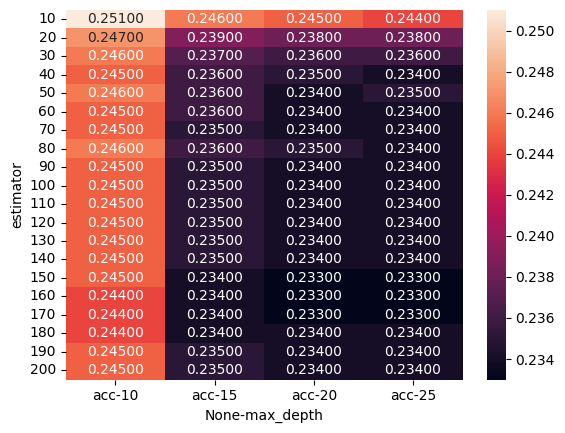

In [309]:
import seaborn as sns
sns.heatmap(df_scores_pivot, annot=True, fmt=".5f")

> **Answer** `max_depth = 25`

# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature? 

* `total_rooms`
* `median_income`	
* `total_bedrooms`
* `longitude`

In [310]:
rfr = train_random_forest_regressor(X_train, y_train, 
                                    n_estimators=10, 
                                    random_state=1, 
                                    n_jobs=-1,
                                    max_depth=20)

In [311]:
feature_importance = rfr.feature_importances_

In [312]:
feature_list = list(dv.get_feature_names_out())

In [313]:
for feature, importance in zip(feature_list, feature_importance):
    print(f"{feature}: {importance}")

households: 0.014904780264590167
housing_median_age: 0.03004269417873657
latitude: 0.10271687386164392
longitude: 0.08579061141056853
median_income: 0.3355070433470429
ocean_proximity=<1H OCEAN: 0.21881985433078338
ocean_proximity=INLAND: 0.1474595540682817
population: 0.02821150531672544
total_bedrooms: 0.015227641883313336
total_rooms: 0.02131944133831403


> **Answer** `median_income: 0.3355070433470429`

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both gives same

### Install XGBoost

In [315]:
!pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


### Create DMatrix for train and validation

In [316]:
features = dv.get_feature_names_out()
features

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=<1H OCEAN',
       'ocean_proximity=INLAND', 'population', 'total_bedrooms',
       'total_rooms'], dtype=object)

In [317]:
features = ['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity_1H_OCEAN',
       'ocean_proximity_INLAND', 'population', 'total_bedrooms',
       'total_rooms']

In [318]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [319]:
for eta in range (1, 4, 1):
    eta_value = round(eta * 0.1, 1)
    xgb_params = {
        'eta': eta_value, 
        'max_depth': 6,
        'min_child_weight': 1,

        'objective': 'reg:squarederror',
        'nthread': 8,

        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=100)
    y_pred = model.predict(dval)
    rmse_value = rmse(y_val, y_pred)
    print(f"eta: {eta_value}, rmse : {rmse_value}")

eta: 0.1, rmse : 0.232
eta: 0.2, rmse : 0.228
eta: 0.3, rmse : 0.229


> **Answer** `eta: 0.3, rmse : 0.229`